<a href="https://colab.research.google.com/github/martinpius/Computer-Vission/blob/main/CNN_Wrath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are on colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...please load your drive")
def time_fmt(x:float = 123.7615)->float:
  h = int(x / (60 * 60))
  m = int(x % (60 * 60) / 60)
  s = int(x % 60)
  return f" {h}: {m:>03}: {s:>05.2f}"
print(f"--->testing...\ntime elapse is : {time_fmt()}")

Mounted at /content/drive
You are on colab with tensorflow version: 2.4.1
--->testing...
time elapse is :  0: 002: 03.00


In [2]:
import tensorflow as tf
import time, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow.keras.backend as K


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(f"x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}\nx_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}")

x_train_shape: (60000, 28, 28), y_train_shape: (60000,)
x_test_shape: (10000, 28, 28), y_test_shape: (10000,)


In [5]:
#reshape the data:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
print(f"x_train_shape: {x_train.shape}, x_test_shape: {x_test.shape}")

x_train_shape: (60000, 28, 28, 1), x_test_shape: (10000, 28, 28, 1)


In [7]:
#categorize the labels:
y_train, y_test = tf.keras.utils.to_categorical(y_train, num_classes = 10), tf.keras.utils.to_categorical(y_test, num_classes = 10)
print(f"y_train_shape: {y_train.shape}, y_test_shape: {y_test.shape}")

y_train_shape: (60000, 10), y_test_shape: (10000, 10)


Model: "cnn_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mnist_dim (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               16

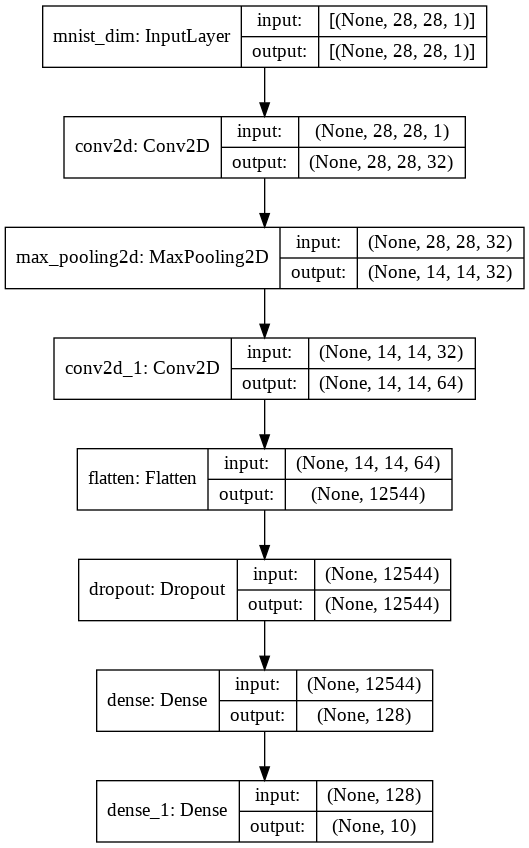

In [8]:
#simple cnn:
inputs = tf.keras.Input(shape = input_shape, name = 'mnist_dim')
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same',kernel_initializer = 'random_normal')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), kernel_initializer = 'random_normal', padding = 'same', activation = 'relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate = 0.25)(x)
x = tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_initializer = 'random_normal')(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'cnn_mnist')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = "cnn_mnist.png", show_shapes = True)

In [9]:
#training loop from the scratch:
EPOCHS = 30
BUFFER = 1024
BATCH_SIZE = 128
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(BUFFER).batch(batch_size = BATCH_SIZE, drop_remainder = True)
validation_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
validatin_data = validation_data.batch(batch_size = BATCH_SIZE, drop_remainder = True)
train_sample_batch_x, train_sample_batch_y = next(iter(train_data))
print(f"train_x_sample_batch_shape: {train_sample_batch_x.shape}, train_sample_batch_y_shape: {train_sample_batch_y.shape}")

train_x_sample_batch_shape: (128, 28, 28, 1), train_sample_batch_y_shape: (128, 10)


In [10]:
#Get the loss object, optimizer and evaluation metrics

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss_obj = tf.keras.losses.CategoricalCrossentropy()
train_metric = tf.keras.metrics.CategoricalAccuracy()
eval_metric = tf.keras.metrics.CategoricalAccuracy()


In [12]:
#Training step

In [ ]:
tic = time.time()
print("....training starts, please wait.....")
for epoch in range(EPOCHS):
  print(f"the start of epoch: {epoch + 1}")
  for (step, (x_train_batch, y_train_batch)) in enumerate(train_data):
    with tf.GradientTape() as tape:
      y_preds = model(x_train_batch, training = True)
      train_loss = loss_obj(y_train_batch, y_preds)
    grads = tape.gradient(train_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_metric.update_state(y_train_batch, y_preds)
    train_acc = train_metric.result()
    train_metric.reset_states()
    if step % 200 == 0:
      print(f"at epoch: {epoch + 1}, train accuracy is: {float(train_acc):.4f}")
      print(f"batch number: {step}, train loss is: {float(train_loss):.4f}")
  
  for (step, (x_val_batch, y_val_batch)) in enumerate(validation_data):
    y_preds = model(x_val_batch, training = False)
    loss = loss_obj(y_val_batch, y_preds)
    eval_metric.update_state(y_val_batch, y_preds)
    val_acc = eval_metric.result()
    eval_metric.reset_states()

    if step % 200 == 0:
      print(f"epoch: {epoch}, validation accuracy: {float(val_acc):.4f}")
      print(f"batch: {step + 1}: validation loss: {float(loss):.4f}")

toc = time.time()
print(f"\ntime elapse is: {time_fmt(toc - tic)}")




....training starts, please wait.....
the start of epoch: 1
at epoch: 1, train accuracy is: 0.1250
batch number: 0, train loss is: 2.3373
at epoch: 1, train accuracy is: 0.9844
batch number: 200, train loss is: 0.0470
at epoch: 1, train accuracy is: 0.9844
batch number: 400, train loss is: 0.0666
